# Neural Networks
----
Micrograd: Autograd: automatic engine, implements backpropagation.

Backpropagation: is an algorithm that allows you to efficiently evaluate the gradient of a loss function with respect to weights of the NN.

That allows us to we can iteratively tune the weight of network to minimize the loss function and therefore improve the accuracy of the network.

Backpropagation could be at the mathematical core of any modern deep neural libraries. like Pytorch or jax.

**NN:** just a mathematical expressions, they take the input data as input and weights of a neural networks as a input and mathematical expression. And output is your predictions of your NN or loss function

# 1st Good understanding is what derivative is and what information it gives you .


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## defining a scaler valued function f(x)

def f(x):
  ## takes single scaler x and returns single scaler y
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

Thats for only one value x.

we can draw a parabola with multiple valuees.

let say get value from -5 to 5
and get its y values and plot.

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


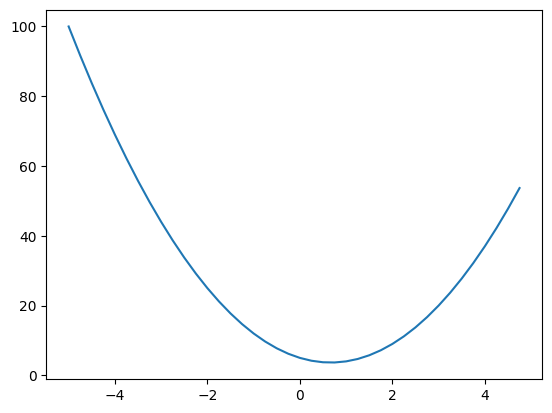

In [ ]:
xs = np.arange(-5,5,0.25)
print(xs)
ys = f(xs)
plt.plot(xs,ys)

As we can see if we give 3.0 as x and it will give us y as 20, can be seen on graph

Now Think what is the derivative of function `f(x)` at any single input `x`. derivative of function at different point of `x`.

In school we would do all the calculations on the paper and derive the equation and then pass all the x values to get derivatives.

But here we are not going to do that because no one in neural networks writes out expressions for the NN. It would be tens of thousands of terms that derives the derivative.

Instead of symbolic aproach we have to understand what derivative(defination of derivative) is and understand what derivative is measuring, what it is telling you about the function

---

## Derivative of a function f(x)

$$ L = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} $$

What it is saying is that if you slightly bump up the, you are at some point `x` you are intrested in, and if you slightly bumpup `x` by small number `h`, how does the function respond, what is the slope at that point, does the function go up or down and by how much. the slope of that function or responce at that point.


So we can evaluate derivative here numerically by taking the a very small `h`




Take

refere graph with x its corresponding y values
```py
h = 0.0001
x = 3.0

f(x) # output will be 20

# so doing f(x + h) will it be greater than 20 or will be down?

f(x + h) # 20.001400030

## the value is slightly up

## how much function responded?
f(x+h) - f(x) # 0.0014000300000063248 function responded in a positive direction


# then normalize by the run, so rize over run to get slope
(f(x + h) - f(x))/h # 14.000300000063248
```

Here we have to take `h`'s value very very small amount to get the exsect value.

so at `x = 3` the slope is `14`

### slope at `x = -3`?

telling exact value is hard but what will be the sign of the value?

from the graph try to ans.

so for -3 if we go slightly in a positive direction then function will go down.

we will get slightly below 20.

```py
h = 0.0001
x = -3.0

f(x) # output will be 44.0

# so doing f(x + h) will it be greater than 40.0 or will be down?

f(x + h) # 43.99780002999999, value decreased

## the value is slightly down

## how much function responded?
f(x+h) - f(x) # -0.0021999700000066014 function responded in a negative direction


# then normalize by the run, so rize over run to get slope
(f(x + h) - f(x))/h # -21.999700000066014
```

> 💡 and some point at graph the **slope will be `0`** like at x = 2/3

In [ ]:
h = 0.0001
x = -3.0
# f(x)
(f(x + h) - f(x))/h

-21.999700000066014

## Explaination of below code

function of 3 scaler input a, b, and c as ouput as d
`d = a*b+c`

a = 2.0

b = -3.0

c = 10.0

3 inputs to our expression graph and single o/p `d`

printing `d` we get `4.0` as o/p

⛳️ we want to take derivative of `d` with respect to `a`, `b`, and `c`. and thinking what derivative is telling

In [ ]:
# more complex example
a = 2.0
b = -3.0
c = 10.0

d = a*b+c # function of three scaler inputs a,b, and c with output as d
print(d)

4.0


1st taking derivative of `d1` wrt `a`

In [ ]:
h = 0.0001 # taking small h

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c

c += h

d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


NNs are prety massive math expressions so we need some data structures that maintain these expressions.

Let's start to build out

In [ ]:
class Value():

  def __init__(self, data, _children=(), _op='', label=''):
    """
    @params:
    data: actual value
    _children: default empty tuple,
    """
    self.data = data
    self.grad = 0.0 # initially it will be zero
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [ ]:
a = Value(10, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
# a*b+c

e = a*b; e.label='e'
d = e + c; d.label='d'
d
# (a.__mul__(b)).__add__(c)

# making this one layer deeper
f = Value(-2.0, label='f')

L = d * f; L.label = 'L' #output of d*f
L

Value(data=40.0)

Now the missing thing is connectin of this expression. we need to keep expression graph.

we need to know and keep pointers about what values produces what other values.

for that we introduce new variable `children` in `Value` class

by default `_children` will be `empty set`.

and creating a `_prev` variable which is `set of _children`

and when doing `multiplication` and `addition` operations pass `self and other` as child.

```py
a = Value(10)
b = Value(-3.0)
c = Value(10.0)
d = a*b+c
# now we can see d's childs
d._prev
```

now we can get a child of d using `d._prev`

Now we can get child but we don't know which operation did it performed. For that add onethore param `_op` by default empty.

In [ ]:
# a = Value(10)
# b = Value(-3.0)
# c = Value(10.0)
# d = a*b+c
# # now we can see d's childs
# d._prev

In [ ]:
d._op # now we have d._op for operation
# this tells d was produced by addition of those two values

'+'

In [ ]:
from graphviz import Digraph

def trace(root):
  # build a set of  all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges


def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectengular ("record") node for it
    dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label,n.data, n.grad,), shape='record')
    if n._op:
      # if this value is result of some operation, create an op node for it
      dot.node(name=uid+n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to output node n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

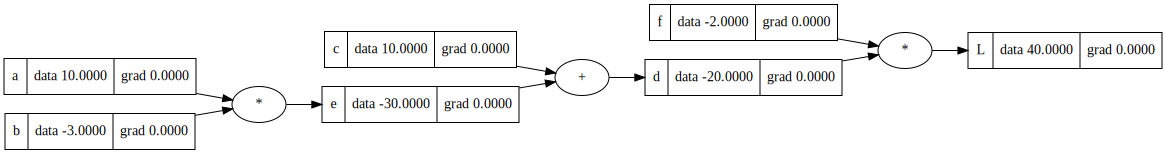

In [ ]:
draw_dot(L)

## 📍 Important notes, Read again and rewrite clearly

Above image or process shows forward pass

givving multiple inputs and getting single output L

and output of the forward pass is L = 40.0

Now, next we would like to run backpropagation

In back P, we start from the end L and reverse and calculate the gradient along all these intermediate values.

and we have to derive a derivative of L with respect to all the parameters

calculating derivative of L wrt f, d , c, e, b, and a

> ✅ We would be very intrested in the derivative of loss function L with respect to weights of a neural networs

Some of these labes represents the weights of the NN

So, we will need to know how those weights are impacting the loss function

so we are interesting in. dereivative of output wrt some of its leaf nodes, and those leaf nodes will be the weights of the neural nets.

other leaf nodes are the data itself, But we will not use the derivative of loss function wrt data beacause the data is fixed, but the weights will be iterating on using gradient information

# 📍Important -> creating a variable inside a Value class

that maintains the derivative of L WRT that value, call this variable `grad`

# Manual Back propagation

- `grad` variable representing gradient of L WRT each label

so for `L` how much does `L` change? it changes by `h`. so derivative or `L` WRT `L` would be `1`.

We can measure this with numerics as well.

L.grad = 1.0

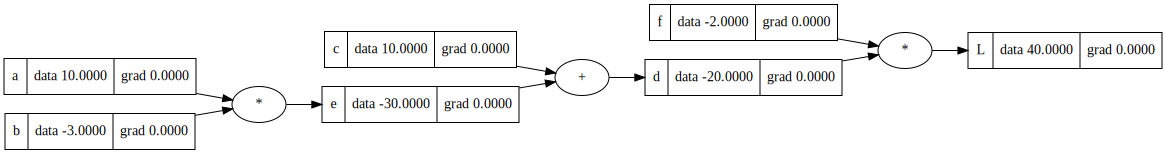

In [ ]:
# to draw ndoes
draw_dot(L)

In [ ]:
# L = d * f

# dL/dd = ? f

# (f(x + h)-f(x))/h

# ((d+h)*f - d*f) / h
# (d*f + f*h - d*f) / h
# (f*h) / h
# f

## (*) node

dL/dd = f and dL/df = d

double chack by bumping up that variable by h in below method

so dL/dd = value of `f`
and dL/df = value of `d`


1. dL/dd
2. dL/df
3. dL/de
4. dL/dc
5. dL/da
6. dL/db

In [ ]:
L.grad = 1.0

In [ ]:
d.grad = -2.0
f.grad = -20.0

Doing kind of inline gradient check.

## Gradient check
when we deriveing backpropagation and getting derivative WRT all the intermediate results. and numerical gradient is just estimating using small step size `h`

## 📍 Now understand **CRUX** of the backpropagation, The most important node to understand (+) node

> 💡  If you understand gradient for this node then you understand all backpropagation and all training of neural nets.

**Need to derive dL/dc (derivative of L wrt c)**

we have already computed gradient for other d and f params. and continuing the backpropagation manually

so we want dL/dc and also dL/de

**✍️NOTE: For intuision look at the diagra**

**problem:** How do we derive dL/dc?
- we know dL/dd, we know how `L` is sensitive to `d`
- but how is `L` sensitive to `c` ?
- so, we know dL/dd, and we also know how `c` impacts `d`.
- intuatively if you know the impact that `c` is having on `d` and impact that `d` is having on `L`.
- Then we should be shomehow able to putting them together to figure out how `c` impacts `L`.

so let's look at **what is dd/dc?**

dd/dc = ?

we know function(equation of) of d

d = c + e

if you know calculas and remember, diferentiating `c + e` WRT `c`, that gives `1.0`.

and we can go to basics and derive it by bumping it up by value h

(f(x+h)-f(x))/h

((c+h+e)-(c+e))/h    here c+e c+e got cancel out and left with h. and h/h = 1

(c + h + e - c - e))/h

h/h = 1

so,

dd/dc = 1.0 and by this

dd/de = 1.0

- so derivative of (+)sum expression is very simple.
- and this is the local derivative.
- calling it local derivative because we have the final o/p value at all the way at the end of the graph.
- and now we are like a small node(+) here. and (+) node doesn't know anything about the rest of the graph that's embedded in.
- all it knows is that it did plus(+). it took `c` and `e` and added them and created `d`. and (+) node also knows the local influence of c on d or rathare dd/dc and also knows dd/de.
- But that's not just that we want. That's just a local derivative.
- What we actualy want is dL/dc.
- L is just one step away here. but in general case this plus node could be embedded in like a massive graph.


- so we know how d impacts l, and how c and e impacts d how do we put that information together to write dL/dc and the **ans is THE CHAIN RULE.** in calculas

# The Chain Rule

Refere: [link](https://youtu.be/H-ybCx8gt-8?si=boPU0WpoXRmFdtl7)

$$ \frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}, $$

Fundamentally it's telling you how we chain these derivatives together correctly.

to differentiate through a function composition we have to apply multiplication of those derivatives

> Intuitively, the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change. [Wikipedia].


so to do this we multiply derivatives

WANT:

dL/dc = ( dL/dd) * (dd/dc). # chain rule

KNOW:

dL/dd

dd/dc

- because local derivative dd/dc is 1 we just copy over the dL/dc * 1

- because dL/dd is -2.000 what is dL/dc? its local gradient(1.0) times dL/dd.
  which is -2.0

So what a + node does is litrely just routes the gradient beacause the pluse node's local derivative is just 1 . so in chain rule 1 times dL/dd is just dL/dd.

so derivative just gets routed to both c and e

In [ ]:
e.grad = -2.0
c.grad = -2.0

Now finally we left with last two parameters a and b which is multiplication node.

and we have already discussed about so apply chain rule and get output.

e = a * b

loca derivative de/da = b and de/db = a

so

dL/da = dL/de (we already know)* de/da

dL/da = -2.0 * -3.0  = 6

and

dL/db = -2.0 * 10.0 = -20.0


In [ ]:
a.grad = 6.0
b.grad = -20.0

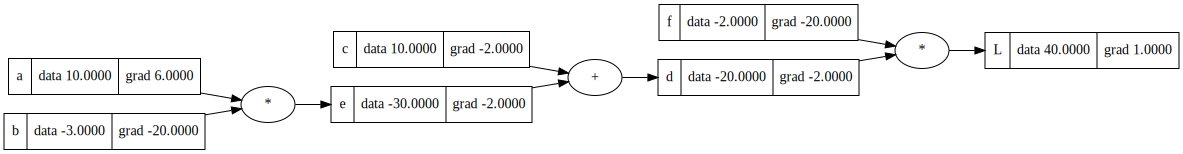

In [ ]:
draw_dot(L)

In [ ]:
-2.0 * 10.0

-20.0

In [ ]:
def lol():
  h = 0.0001 # increasing any parameter by the small amount of h
  # whatever parameter we will add h(bump up by h) then it prints output as dL WRT that parameter.

  a = Value(10, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(10, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label='e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h) # rise over run

lol()

0.0


So, That is the manual backpropagation, all the way from L(loss/output node) to leaf node. and done it peice by pice.

All we done is we iterated from all the node one by one and locally apply the chain rule. we always know the derivative of L WRT this little output and we look at how this output is produced, this output is produced through some operation and we have some pointers to the children node of this operation. and in this little operation we know what the local derivatives are and we just multiply them on to the derivative always. so we go through recursively multiply on the local derivatives and that's what backpropagation is.

its just a recursive application of chain rule through computaion graph.

Let;s see the power in action

a.data change it, if you want L to go up that means we just have to goto the direction of the gradient.

change all the leaf node only not the expression one.

if we nudge in direction of gradient we expact positive influence on L

so we expact L to go UP positively, so it should become less negative. it should go up to say -6 or something like that

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

#rewrite the forward pass

e = a*b
d = e + c
# f will remain unchanged
L = d * f;

print(L.data)

48.866400000000006


# one more example of backpropagation using bit more complex and useful example